In [14]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
audience = pd.read_csv('audiences_info.csv')
# if no test_result, assume that the audience is not infected
audience.fillna(value=False, inplace=True)
audience.isna().sum()

Name                 0
id_Number            0
row_Number           0
seat_Number          0
auditorium_Number    0
test_result          0
score                0
dtype: int64

In [16]:
print(audience['auditorium_Number'].unique())
audience.head(n=15)

[4 6 2 1 3 5]


,Name,id_Number,row_Number,seat_Number,auditorium_Number,test_result,score
0,Aaron Cave,16468200709121559,46,47,4,False,82.166889
1,Aaron Cullins,31326194909026791,14,13,6,False,55.339505
2,Aaron Jones,22363196908218633,68,29,4,False,76.146857
3,Aaron Kimmer,39393193504274332,33,36,2,True,72.346274
4,Aaron Selby,98571194410035095,40,23,4,False,70.980438
5,Aaron Tamura,32143194906296211,26,25,6,False,73.443440
6,Aaron Turner,43262193503188083,31,36,2,True,61.292429
7,Aaron Wallin,38689197101147259,39,46,4,False,80.954978
8,Aaron Watkins,99453198307304264,49,40,4,False,79.704114
9,Abbey Olson,39662196108256461,31,51,4,False,63.646335


In [17]:
result = {i:{'initial':None, 'infect_time':None, 'positive': None, 'score':None, 'name':None} for i in range(1,7)}
# 'initial': the initial situation of the audience
# 'infect_time': earliest possisible infection time for all the audiences
# 'positive': seat of all the positive cases
# 'name': (name, id_Number) of all the audiences 

In [18]:
def get_aud_info(aud_num):
    info = audience[audience['auditorium_Number']==aud_num]
    # get the size of the auditorium
    row = max(info['row_Number'])
    seat = max(info['seat_Number'])
    print('Auditorium '+str(aud_num)+' with size (' +str(row) + ', ' + str(seat) + ')')
    
    # aud = -1 if empty, 1 if infected, 0 if healthy
    aud = np.ones((row,seat))*(-1)
    # score = -1 if empty, else: score of that person
    score = np.ones((row,seat))*(-1)
    # infect = 0 if infected, else -1
    infect = np.ones((row,seat))*(-1)
    name = [[None for j in range(seat)] for i in range(row)]
    positive = []
    
    infected = info.loc[info['test_result']==True,['row_Number','seat_Number']]
    healthy = info.loc[info['test_result']==False,['row_Number','seat_Number']]
    
    print('number of infected people:',len(infected))
    print('number of healthy people:',len(healthy))
    
    for r,c in infected.values:
        aud[r-1,c-1] = 1
        infect[r-1,c-1] = 0
    for r,c in healthy.values:
        aud[r-1,c-1] = 0
    for n, ID, r, c, s in info.loc[:,['Name','id_Number','row_Number','seat_Number','score']].values:
        score[r-1,c-1] = math.floor(s * 0.06)
        name[r-1][c-1] = (n,ID)
    
    result[aud_num]['initial'] = aud
    result[aud_num]['infect_time'] = infect
    result[aud_num]['positive'] = infected.values-1
    result[aud_num]['score'] = score
    result[aud_num]['name'] = name
    
    plt.figure(figsize=(8,8))
    plt.imshow(aud)
    plt.title('Auditorium'+str(aud_num));

In [19]:
def get_infect_time(aud_num):
    
    # the idea id to carry out bfs on all the initially positive people, and store the time for
    # infection for each person. whenevr a person could have been infected earlier, the time for
    # his/her infection is updated.
    # in the end, the returned infection time is the maximal infection time among all the audiences
    
    aud = result[aud_num]['initial']
    infect = result[aud_num]['infect_time']
    score = result[aud_num]['score']
    row, seat = aud.shape
    
    for start in result[aud_num]['positive']:
        queue = [start]
        while len(queue) != 0:
            r,c = queue[0]
            queue = queue[1:]
            for n_r, n_c in [(r+1,c),(r-1,c),(r,c+1),(r,c-1)]:
                if (0 <= n_r < row) and ( 0 <= n_c < seat):
                    if aud[n_r, n_c]>=0: # if there is people there
                        # not infected yet or could have been infected earlier
                        if (infect[n_r, n_c]<0) or (infect[n_r, n_c] > infect[r,c] + score[n_r, n_c]):
                            infect[n_r, n_c] = infect[r,c] + score[n_r, n_c]
                            # which means other people could have been infected earlier as well
                            queue.append((n_r, n_c))
    
    print(infect.max())
    plt.figure(figsize=(8,8))
    plt.imshow(result[aud_num]['infect_time']);

Auditorium 1 with size (50, 68)
number of infected people: 186
number of healthy people: 2376
42.0


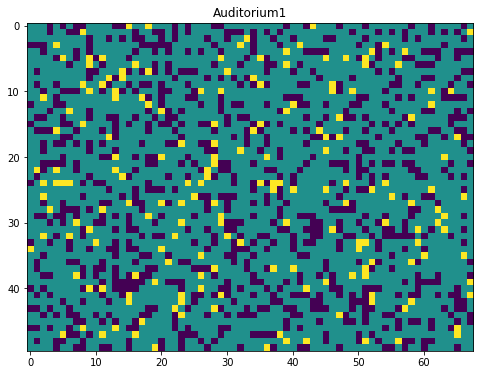

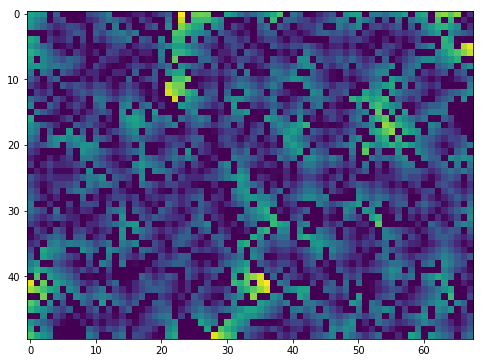

In [20]:
get_aud_info(1)
get_infect_time(1)

Auditorium 2 with size (59, 66)
number of infected people: 245
number of healthy people: 2745
43.0


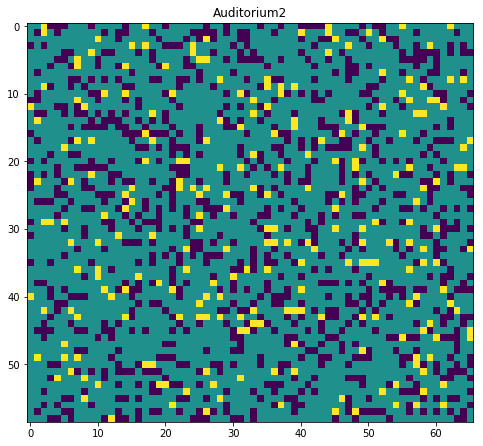

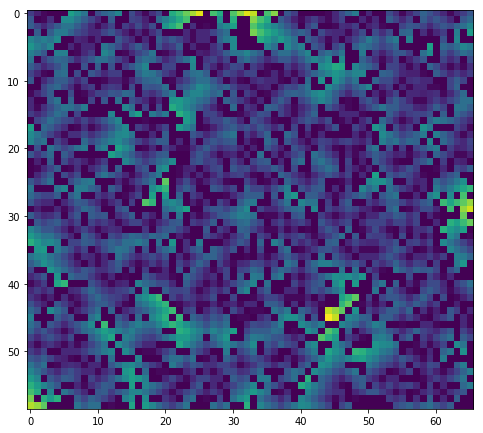

In [21]:
get_aud_info(2)
get_infect_time(2)

Auditorium 3 with size (39, 47)
number of infected people: 118
number of healthy people: 1276
34.0


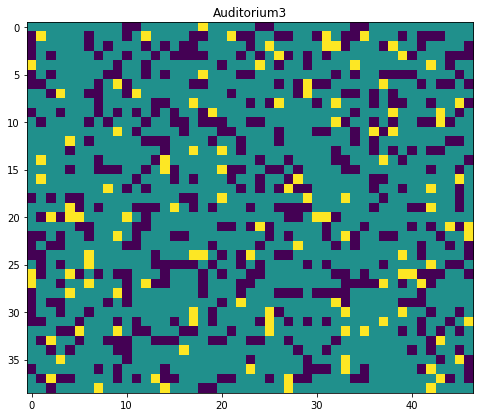

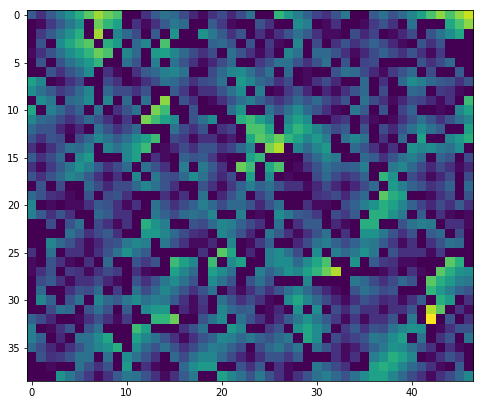

In [22]:
get_aud_info(3)
get_infect_time(3)

Auditorium 4 with size (68, 68)
number of infected people: 286
number of healthy people: 3206
38.0


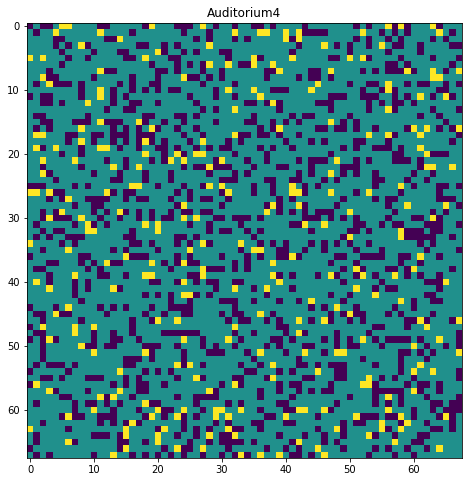

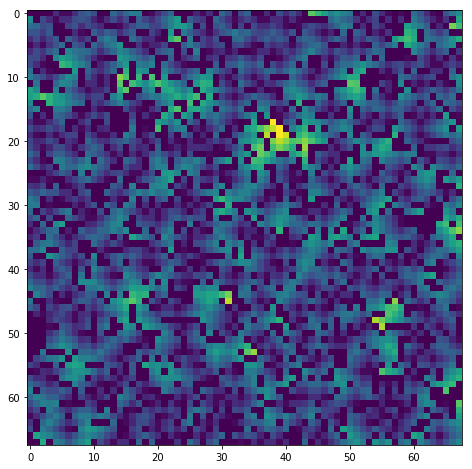

In [23]:
get_aud_info(4)
get_infect_time(4)

Auditorium 5 with size (46, 62)
number of infected people: 221
number of healthy people: 1933
39.0


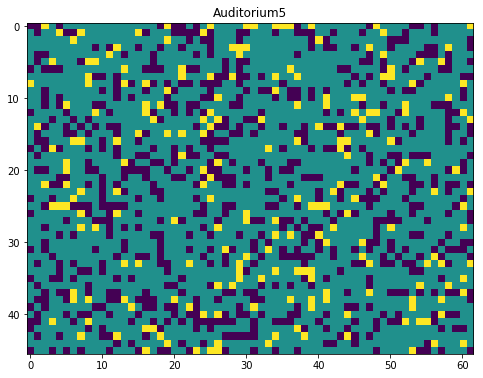

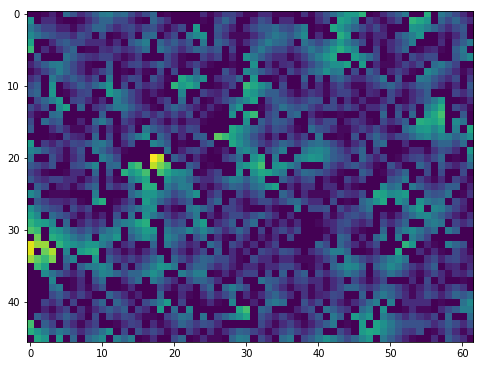

In [24]:
get_aud_info(5)
get_infect_time(5)

Auditorium 6 with size (43, 43)
number of infected people: 113
number of healthy people: 1301
49.0


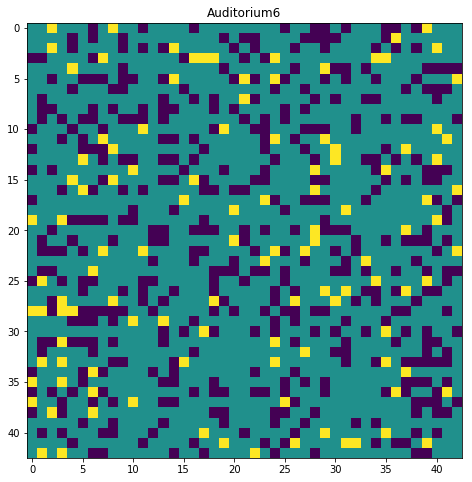

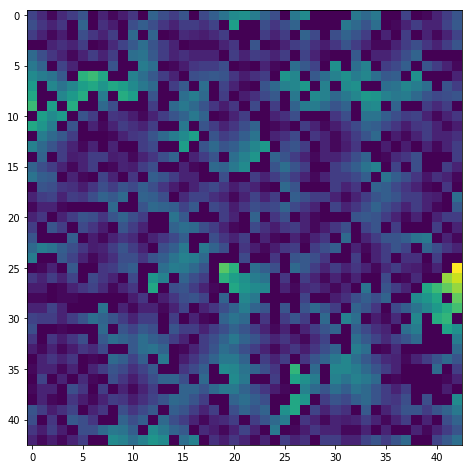

In [25]:
get_aud_info(6)
get_infect_time(6)